In [1]:
#%pip install matplotlib

## Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [11]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
df = pd.read_csv('./Source_Data/stud_math.xls', na_values='')




In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [13]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
318,GP,F,17,R,GT3,T,3.0,4.0,at_home,services,course,NaN,1.0,3.0,0.0,no,yes,NaN,yes,no,-9.0,yes,yes,no,4.0,3.0,4.0,5.0,0.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
271,GP,F,18,U,GT3,NaN,2.0,3.0,other,services,reputation,father,1.0,4.0,0.0,no,NaN,yes,yes,yes,-12.0,yes,yes,yes,4.0,5.0,5.0,2.0,4.0,70.0
257,GP,M,19,U,LE3,A,4.0,3.0,services,at_home,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,1.0,1.0,12.0,55.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
269,GP,F,18,R,GT3,T,2.0,1.0,other,other,reputation,mother,2.0,2.0,0.0,no,NaN,no,no,yes,-6.0,no,yes,yes,4.0,3.0,5.0,3.0,0.0,0.0
123,GP,M,16,U,GT3,T,4.0,4.0,health,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,4.0,4.0,5.0,18.0,65.0


In [14]:
df = df.rename(columns={'studytime, granular': 'studytime_granular'})

In [15]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [16]:
for col in df.columns:
    pct_missing = df[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.3%
famsize - 6.8%
Pstatus - 11.4%
Medu - 0.8%
Fedu - 6.1%
Mjob - 4.8%
Fjob - 9.1%
reason - 4.3%
guardian - 7.8%
traveltime - 7.1%
studytime - 1.8%
failures - 5.6%
schoolsup - 2.3%
famsup - 9.9%
paid - 10.1%
activities - 3.5%
nursery - 4.1%
studytime_granular - 1.8%
higher - 5.1%
internet - 8.6%
romantic - 7.8%
famrel - 6.8%
freetime - 2.8%
goout - 2.0%
health - 3.8%
absences - 3.0%
score - 1.5%


## score

In [17]:
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
x_25 = df.score.quantile(0.25)
x_75 = df.score.quantile(0.75)
print(
'25-й перцентиль: {},'.format(x_25),
'75-й перцентиль: {},'.format(x_75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=x_25 - 1.5*IQR, l=x_75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

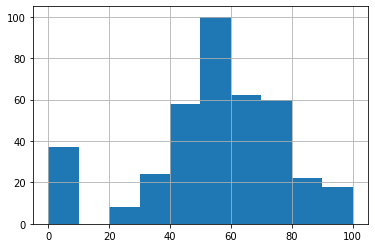

In [18]:
df.score.hist()
df.score.describe()

In [19]:
df = df.loc[df.score >= 20]

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

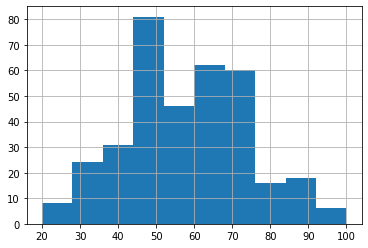

In [20]:
df.score.hist()
df.score.describe()

## absences

In [21]:
df.absences.value_counts()

0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
14.0     12
12.0     12
16.0      7
3.0       7
7.0       6
18.0      5
5.0       5
20.0      4
9.0       3
22.0      3
1.0       3
13.0      2
15.0      2
11.0      2
40.0      1
38.0      1
56.0      1
23.0      1
24.0      1
25.0      1
385.0     1
17.0      1
75.0      1
21.0      1
212.0     1
28.0      1
19.0      1
26.0      1
30.0      1
54.0      1
Name: absences, dtype: int64

In [22]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
x_25 = df.absences.quantile(0.25)
x_75 = df.absences.quantile(0.75)
print(
'25-й перцентиль: {},'.format(x_25),
'75-й перцентиль: {},'.format(x_75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=x_25 - 1.5*IQR, l=x_75 + 1.5*IQR))


25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

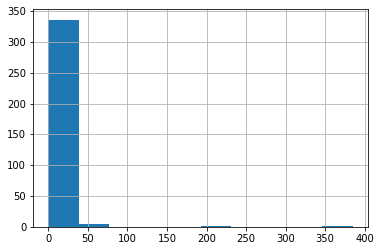

In [23]:
df.absences.hist()
df.absences.describe()


In [24]:
df = df.loc[df.absences <= 20]

count    325.000000
mean       5.120000
std        5.003801
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       20.000000
Name: absences, dtype: float64

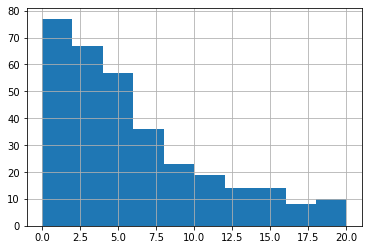

In [25]:
df.absences.hist()
df.absences.describe()

## age


In [26]:
df.age.value_counts()

16    91
17    80
15    73
18    64
19    13
20     2
21     1
22     1
Name: age, dtype: int64

## studytime

count    320.000000
mean       2.056250
std        0.854616
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

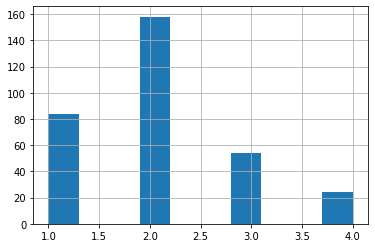

In [27]:
df.studytime.hist()
df.studytime.describe()

## traveltime

count    302.000000
mean       1.433775
std        0.706344
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

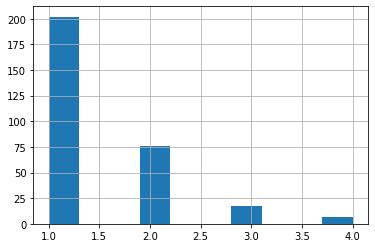

In [28]:
df.traveltime.hist()
df.traveltime.describe()

## studytime_granular

count    320.000000
mean      -6.168750
std        2.563848
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

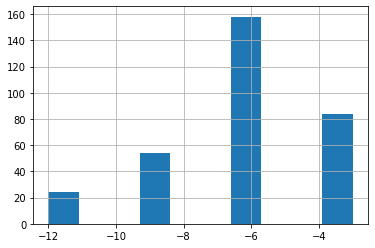

In [29]:
df.studytime_granular.hist()
df.studytime_granular.describe()

In [30]:
#увеличим дефолтный размер графиков
from pylab import rcParams

rcParams['figure.figsize'] = 13,6


In [31]:
df.corr()



,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.144780,-0.132345,0.094408,0.006808,0.212319,-0.006808,0.062435,0.034407,0.136115,-0.048883,0.209530,-0.131938
Medu,-0.144780,1.000000,0.241815,-0.188091,0.082937,-0.217992,-0.082937,0.000802,0.023265,0.056421,-0.047652,0.034569,0.197099
Fedu,-0.132345,0.241815,1.000000,0.047010,0.048223,-0.150615,-0.048223,0.054035,-0.073505,-0.039233,0.024705,-0.028650,0.068160
traveltime,0.094408,-0.188091,0.047010,1.000000,-0.088687,0.102379,0.088687,-0.023082,-0.006976,0.014037,0.015320,-0.044581,-0.077030
studytime,0.006808,0.082937,0.048223,-0.088687,1.000000,-0.160046,-1.000000,0.062511,-0.144205,-0.014917,-0.098745,-0.094304,0.147275
failures,0.212319,-0.217992,-0.150615,0.102379,-0.160046,1.000000,0.160046,-0.015630,0.123916,0.114275,0.079806,0.172971,-0.280834
studytime_granular,-0.006808,-0.082937,-0.048223,0.088687,-1.000000,0.160046,1.000000,-0.062511,0.144205,0.014917,0.098745,0.094304,-0.147275
famrel,0.062435,0.000802,0.054035,-0.023082,0.062511,-0.015630,-0.062511,1.000000,0.164975,0.052665,0.087690,-0.122074,0.074328
freetime,0.034407,0.023265,-0.073505,-0.006976,-0.144205,0.123916,0.144205,0.164975,1.000000,0.283196,0.047108,0.090665,0.002375
goout,0.136115,0.056421,-0.039233,0.014037,-0.014917,0.114275,0.014917,0.052665,0.283196,1.000000,0.018898,0.131236,-0.188648


<AxesSubplot:>

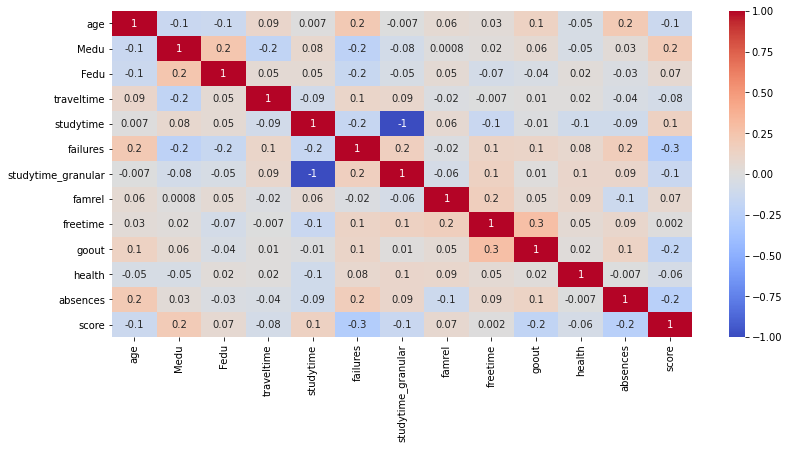

In [32]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linecolor='black')

# Check the EDA Analyse by "pandas_profiling"

In [33]:
#pandas_profiling.ProfileReport(df)